In [1]:

# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm

from fbprophet import Prophet

In [2]:
from DataReader import DataReader
dr = DataReader()
train_df, test_df = dr.get_raw_data()

In [3]:
train_df = train_df[train_df.close==0]
train_df = train_df[train_df.price_am!=-1]
train_df = train_df[train_df.price_pm!=-1]

In [4]:
df = train_df[["datetime", "y"]]
df["ds"] = df.datetime
df = df.drop("datetime", axis=1)
df.head()

/Users/tatsukikoga/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,y,ds
187,16,2011-01-04
188,16,2011-01-05
189,13,2011-01-06
190,14,2011-01-07
191,16,2011-01-08


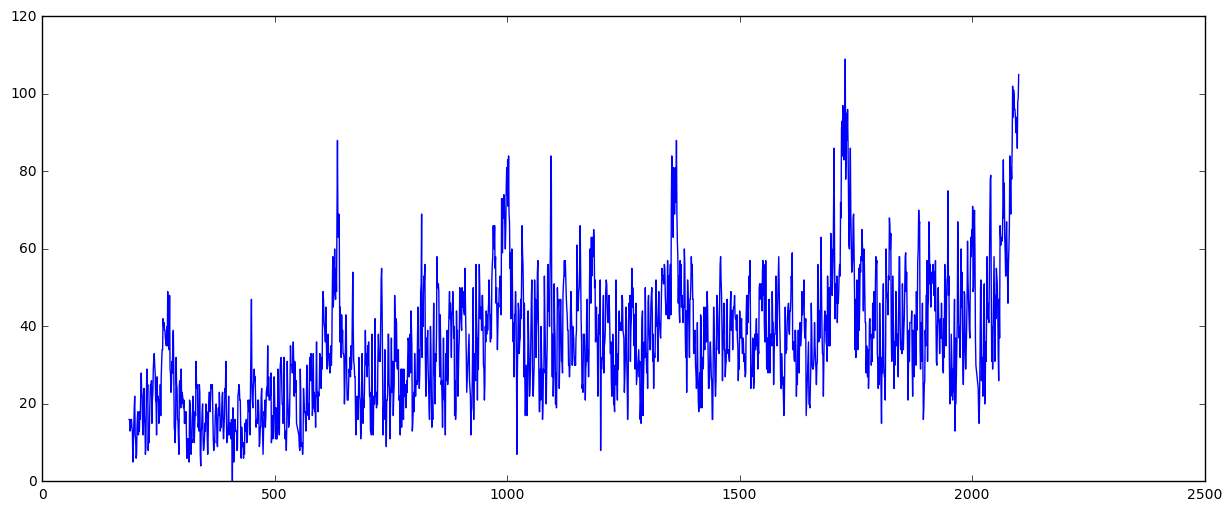

In [5]:
plt.plot(df.y)

In [6]:
event_df_train = pd.DataFrame({
  'holiday': 'client_train',
  'ds': train_df[train_df.client == 1].datetime,
})
event_df_test = pd.DataFrame({
  'holiday': 'client_test',
  'ds': test_df[test_df.client == 1].datetime,
})

event_df = pd.concat((event_df_train, event_df_test))

m = Prophet(weekly_seasonality=True, yearly_seasonality=True, holidays=event_df)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2249,2017-03-27,86.556324,76.589414,96.264490
2250,2017-03-28,83.808084,73.635688,93.943186
2251,2017-03-29,84.176018,73.060878,94.453274
2252,2017-03-30,85.647720,75.424571,95.445428
2253,2017-03-31,89.587197,79.485877,99.500720


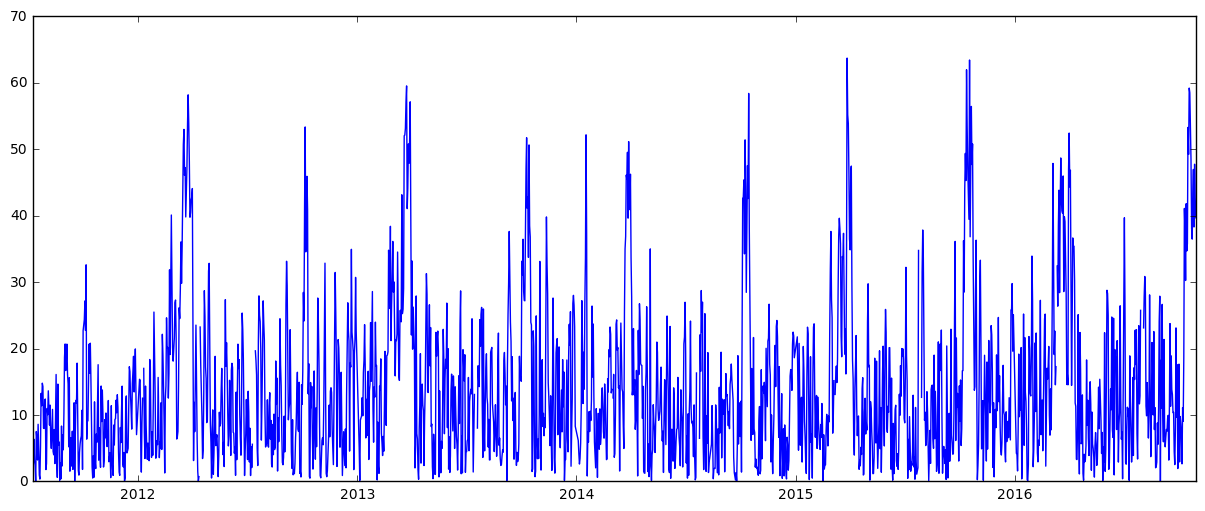

In [7]:
plt.plot(forecast[:2101].ds, abs(forecast[:2101].yhat - df.y))

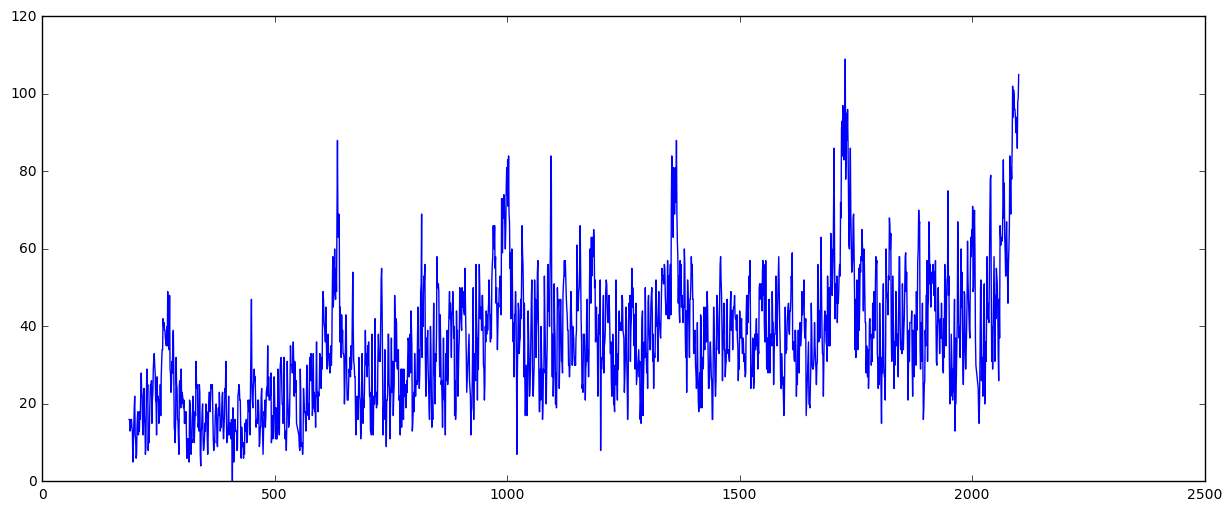

In [8]:
plt.plot(df.y)

In [9]:
test_df.datetime.head()

0    2016-04-01
1    2016-04-02
2    2016-04-03
3    2016-04-04
4    2016-04-05
Name: datetime, dtype: object

In [10]:
forecast[forecast.ds=='2016-04-01']

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,client_test,client_test_lower,client_test_upper,client_train,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1889,2016-04-01,49.150572,49.150572,49.150572,71.115844,91.622731,0.0,0.0,0.0,0.0,...,32.294782,32.294782,32.294782,0.324557,0.324557,0.324557,23.089583,23.089583,23.089583,81.445354


In [11]:
ans = forecast[1889:]
len(ans) == len(test_df)

True

In [12]:
ans = ans.reset_index()
test_df = test_df.reset_index()

In [13]:
ans_ = pd.concat([ans, test_df], axis=1)
ans_

,index,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,client_test,client_test_lower,client_test_upper,...,yearly,yearly_lower,yearly_upper,yhat,index,datetime,client,close,price_am,price_pm
0,1889,2016-04-01,49.150572,49.150572,49.150572,71.115844,91.622731,0.0,0.0,0.0,...,23.089583,23.089583,23.089583,81.445354,0,2016-04-01,1,0,3,2
1,1890,2016-04-02,49.165634,49.165634,49.165634,75.338070,95.020229,0.0,0.0,0.0,...,21.605066,21.605066,21.605066,85.322112,1,2016-04-02,0,0,5,5
2,1891,2016-04-03,49.180696,49.180696,49.180696,68.555857,88.024824,0.0,0.0,0.0,...,20.054191,20.054191,20.054191,77.859923,2,2016-04-03,1,0,2,2
3,1892,2016-04-04,49.195758,49.195758,49.195758,58.258578,78.600902,0.0,0.0,0.0,...,18.457874,18.457874,18.457874,68.604697,3,2016-04-04,1,0,1,1
4,1893,2016-04-05,49.210820,49.210820,49.210820,50.494635,70.253296,0.0,0.0,0.0,...,16.837117,16.837117,16.837117,60.454938,4,2016-04-05,0,0,1,1
5,1894,2016-04-06,49.225882,49.225882,49.225882,45.033259,65.578226,0.0,0.0,0.0,...,15.212600,15.212600,15.212600,55.450180,5,2016-04-06,1,0,1,1
6,1895,2016-04-07,49.240944,49.240944,49.240944,42.585638,62.039344,0.0,0.0,0.0,...,13.604284,13.604284,13.604284,52.657318,6,2016-04-07,1,0,1,1
7,1896,2016-04-08,49.256006,49.256006,49.256006,44.499871,64.576226,0.0,0.0,0.0,...,12.031034,12.031034,12.031034,54.377320,7,2016-04-08,0,0,1,1
8,1897,2016-04-09,49.271068,49.271068,49.271068,50.559303,70.543191,0.0,0.0,0.0,...,10.510279,10.510279,10.510279,60.417392,8,2016-04-09,1,0,2,2
9,1898,2016-04-10,49.286130,49.286130,49.286130,47.116761,66.877553,0.0,0.0,0.0,...,9.057705,9.057705,9.057705,56.305778,9,2016-04-10,1,0,1,1


In [14]:
ans_['y'] = (1 - ans_['close']) * ans_['yhat'] 

In [15]:
ans_[ans_.close==0].y.head()

0    81.445354
1    85.322112
2    77.859923
3    68.604697
4    60.454938
Name: y, dtype: float64

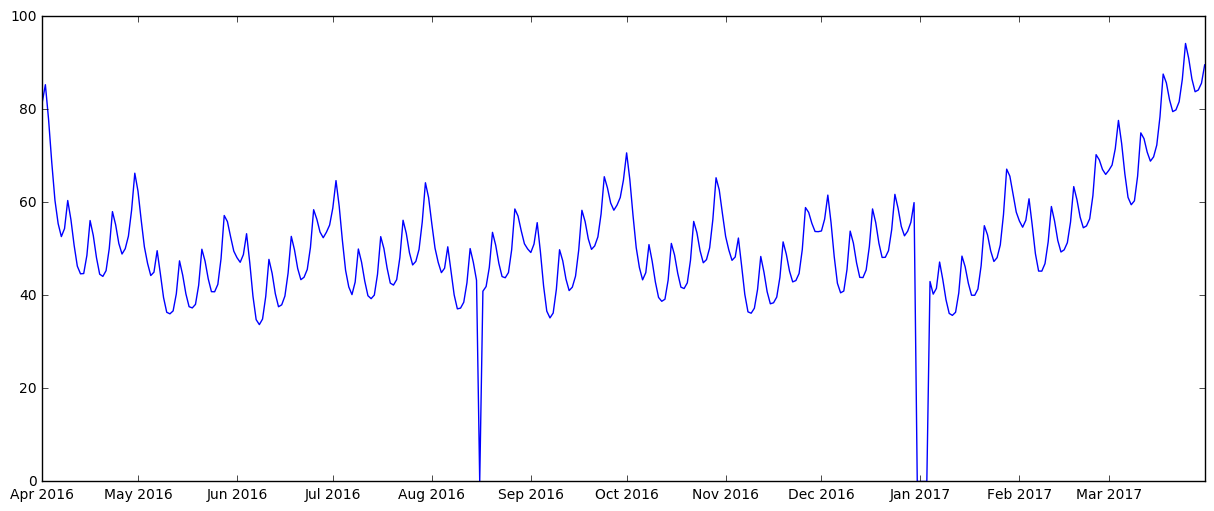

In [16]:
plt.plot(ans_.ds, ans_.y)

In [17]:
print(ans_[ans_.client==1].y.mean(), ans_[ans_.client==0].y.mean())
print(train_df[train_df.client==1].y.mean(), train_df[train_df.client==0].y.mean())

53.38014192282078 49.24083372509067
50.577669902912625 34.57100415923945


In [18]:
test_df[test_df.client==0].count()

index       200
datetime    200
client      200
close       200
price_am    200
price_pm    200
dtype: int64

In [19]:
submission = pd.concat([ans_.ds, ans_.y], axis=1)
submission.to_csv("submission.csv", index=False, header=False)

In [48]:
from sklearn.metrics import mean_absolute_error
train_df, _ = dr.get_raw_data()
train_ans = forecast[:2101]
train_ans = train_ans.reset_index()
ans_ = pd.concat([train_ans, train_df], axis=1)
ans_

,index,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,clinet_test,clinet_test_lower,clinet_test_upper,...,yearly,yearly_lower,yearly_upper,yhat,datetime,y,client,close,price_am,price_pm
0,0,2010-07-01,17.773465,17.773465,17.773465,0.664939,21.224540,0.0,0.0,0.0,...,-1.416293,-1.416293,-1.416293,11.142512,2010-07-01,17,0,0,-1,-1
1,1,2010-07-02,17.774351,17.774351,17.774351,0.767077,22.903342,0.0,0.0,0.0,...,-1.325005,-1.325005,-1.325005,12.945441,2010-07-02,18,0,0,-1,-1
2,2,2010-07-03,17.775237,17.775237,17.775237,8.245210,28.724771,0.0,0.0,0.0,...,-1.231169,-1.231169,-1.231169,18.306360,2010-07-03,20,0,0,-1,-1
3,3,2010-07-04,17.776123,17.776123,17.776123,4.608084,25.809669,0.0,0.0,0.0,...,-1.137159,-1.137159,-1.137159,14.705956,2010-07-04,20,0,0,-1,-1
4,4,2010-07-05,17.777008,17.777008,17.777008,0.082076,21.444502,0.0,0.0,0.0,...,-1.045756,-1.045756,-1.045756,10.251346,2010-07-05,14,0,0,-1,-1
5,5,2010-07-06,17.777894,17.777894,17.777894,-3.510090,18.103404,0.0,0.0,0.0,...,-0.960048,-0.960048,-0.960048,7.433888,2010-07-06,14,0,0,-1,-1
6,6,2010-07-07,17.778780,17.778780,17.778780,-3.742100,17.338853,0.0,0.0,0.0,...,-0.883300,-0.883300,-0.883300,7.135082,2010-07-07,4,0,0,-1,-1
7,7,2010-07-08,17.779666,17.779666,17.779666,-2.469547,17.800823,0.0,0.0,0.0,...,-0.818826,-0.818826,-0.818826,7.931276,2010-07-08,10,0,0,-1,-1
8,8,2010-07-09,17.780552,17.780552,17.780552,1.112092,23.087353,0.0,0.0,0.0,...,-0.769856,-0.769856,-0.769856,11.876890,2010-07-09,12,0,0,-1,-1
9,9,2010-07-10,17.781437,17.781437,17.781437,7.889215,30.396145,0.0,0.0,0.0,...,-0.739401,-0.739401,-0.739401,18.950467,2010-07-10,21,0,0,-1,-1


In [41]:
ans_['y'] = (1 - ans_['close']) * ans_['yhat'] + 15 * ans_['client']
mean_absolute_error(train_df.y, ans_.y)

6.7588496710893136

In [22]:
len(forecast)

2466

In [50]:
ans_[ans_.y - ans_.yhat > 20]

,index,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,clinet_test,clinet_test_lower,clinet_test_upper,...,yearly,yearly_lower,yearly_upper,yhat,datetime,y,client,close,price_am,price_pm
187,187,2011-01-04,17.939110,17.939110,17.939110,-14.806334,6.460018,0.0,0.0,0.0,...,-12.424643,-12.424643,-12.424643,-4.249086,2011-01-04,16,0,0,0,0
188,188,2011-01-05,17.939996,17.939996,17.939996,-15.290021,5.169307,0.0,0.0,0.0,...,-12.628813,-12.628813,-12.628813,-4.798550,2011-01-05,16,0,0,0,0
635,635,2012-03-27,27.106768,27.106768,27.106768,51.288189,72.077223,0.0,0.0,0.0,...,28.630893,28.630893,28.630893,61.876691,2012-03-27,88,0,0,3,2
816,816,2012-09-24,33.608070,33.608070,33.608070,32.853056,54.423844,0.0,0.0,0.0,...,3.816989,3.816989,3.816989,43.919452,2012-09-24,69,0,0,1,0
823,823,2012-10-01,33.859502,33.859502,33.859502,25.277512,45.728784,0.0,0.0,0.0,...,2.456962,2.456962,2.456962,35.752542,2012-10-01,56,0,0,1,1
909,909,2012-12-26,36.827073,36.827073,36.827073,23.312646,44.230751,0.0,0.0,0.0,...,-7.372970,-7.372970,-7.372970,34.484732,2012-12-26,55,0,0,0,0
927,927,2013-01-13,37.411154,37.411154,37.411154,17.672918,39.461332,0.0,0.0,0.0,...,-10.839116,-10.839116,-10.839116,28.395718,2013-01-13,50,0,0,0,0
1094,1094,2013-06-29,40.084420,40.084420,40.084420,43.918439,65.267250,0.0,0.0,0.0,...,-1.564629,-1.564629,-1.564629,54.449804,2013-06-29,84,0,0,2,2
1095,1095,2013-06-30,40.087989,40.087989,40.087989,39.039532,60.021922,0.0,0.0,0.0,...,-1.481944,-1.481944,-1.481944,49.508884,2013-06-30,77,0,0,1,1
1703,1703,2015-02-28,42.321822,42.321822,42.321822,55.603595,75.810710,0.0,0.0,0.0,...,6.626600,6.626600,6.626600,65.846935,2015-02-28,86,0,0,3,2
